In [1]:
import numpy as np, pandas as pd, utils
import matplotlib.pyplot as plt
import seaborn as sns
from pyteomics import mzxml
from datetime import datetime
%matplotlib inline

C:\Users\jcho\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def mzCorrect(refMzs, spec):
    # Sort spec["m/z array"] according to the descending order of spec["intensity array"]
    idx = np.argsort(-spec["intensity array"])    # Descending order
    mzs = spec["m/z array"][idx]
    mzShifts = []
    for refMz in refMzs:
        lL = refMz - refMz * 50 / 1e6
        uL = refMz + refMz * 50 / 1e6
        rows = (spec["m/z array"] >= lL) & (spec["m/z array"] <= uL)
        if sum(rows) > 0:
            mzShift = (spec["m/z array"][rows][0] - refMz) / refMz * 1e6
            mzShifts.append(mzShift)
    return mzShifts

In [4]:
inputFile = "isotope_distribution.xlsx"
paramFile = "jumpm_targeted.params"
mzxmlFile = r"C:\Users\jcho\OneDrive - St. Jude Children's Research Hospital\UDrive\Research\Projects\7Metabolomics\Datasets\13Ctracer_rawdata\7_tracer.mzXML"

# Input dataframe (from Surendhar's program)
inputDf = pd.read_excel(inputFile)
reader = mzxml.MzXML(mzxmlFile)

In [59]:
mzs = [float(mz.split(";")[0]) for mz in inputDf.groupby("idhmdb").min()["isotope_M/Z"]]
gMinMz, gMaxMz = min(mzs) - 10, max(mzs) + 10
uids = inputDf.groupby("idhmdb", as_index=False).min()["idhmdb"]

In [60]:
idx = np.argsort(mzs)
mzs = sorted(mzs)
uids = uids[idx]

In [6]:
ms1 = []
for spec in reader:
    if spec["msLevel"] == 1:
        idx = (spec["m/z array"] >= gMinMz) & (spec["m/z array"] <= gMaxMz)
        spec["m/z array"] = spec["m/z array"][idx]
        spec["intensity array"] = spec["intensity array"][idx]
        ms1.append(spec)

In [7]:
# refMzs = mzs
# idx = np.argsort(-spec["intensity array"])    # Descending order
# mzs = spec["m/z array"][idx]
# mzShifts = []
# for refMz in refMzs:
#     lL = refMz - refMz * 50 / 1e6
#     uL = refMz + refMz * 50 / 1e6
#     rows = (spec["m/z array"] >= lL) & (spec["m/z array"] <= uL)
#     print(spec["m/z array"][rows][0])
#     if sum(rows) > 0:
#         mzShift = (spec["m/z array"][rows][0] - refMz) / refMz & 1e6
#         mzShifts.append(mzShift)

In [8]:
df = pd.DataFrame(ms1)
df.drop(columns=["peaksCount", "polarity", "scanType", "lowMz", "highMz", "basePeakMz", 
                 "basePeakIntensity", "totIonCurrent", "id", "msLevel", "filterLine"], inplace=True)
df = df.apply(pd.Series.explode)    # This operation extracts "m/z array" and "intensity array" into columns

In [61]:
mzShifts = {}
progress = utils.progressBar(len(mzs))
for i in range(len(mzs)):
    progress.increment()
    mz = mzs[i]
    uid = uids[i]
    lL = mz - mz * 25 / 1e6
    uL = mz + mz * 25 / 1e6
    rows = (np.array(df["m/z array"]) >= lL) & (np.array(df["m/z array"]) <= uL)
    subDf = df[rows].sort_values("intensity array", ascending=False).groupby("num", as_index=False).first()
    subDf["mz_shift"] = (subDf["m/z array"] - mz) / mz * 1e6  # PPM
    mzShifts[uid] = subDf

  Progress: [####################] 100% Done...


C:\Users\jcho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\jcho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\jcho\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


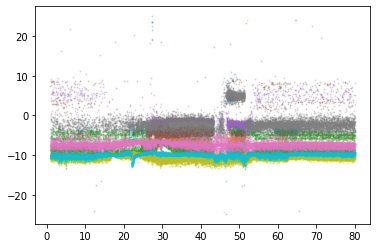

In [62]:
for uid in uids:    
    plt.plot(mzShifts[uid]["retentionTime"], mzShifts[uid]["mz_shift"], '.', alpha=0.2, ms=2)
# plt.plot(mzShifts[uids[10]]["retentionTime"], mzShifts[uids[11]]["mz_shift"], '.')

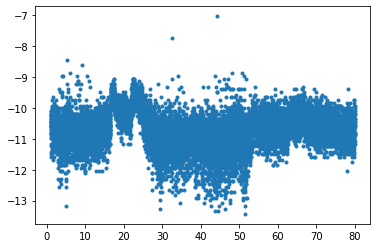

In [63]:
plt.plot(mzShifts[uids[0]]["retentionTime"], mzShifts[uids[0]]["mz_shift"], '.')

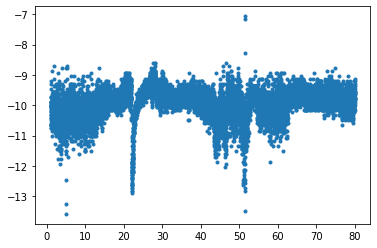

In [64]:
plt.plot(mzShifts[uids[1]]["retentionTime"], mzShifts[uids[1]]["mz_shift"], '.')

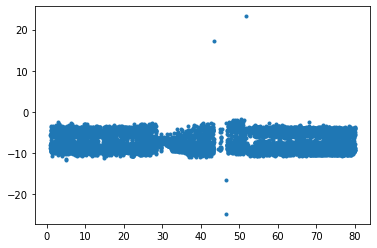

In [65]:
plt.plot(mzShifts[uids[2]]["retentionTime"], mzShifts[uids[2]]["mz_shift"], '.')

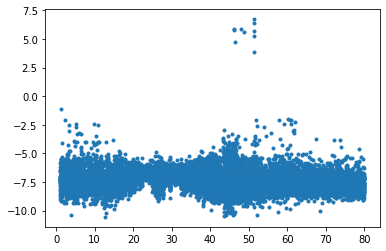

In [66]:
plt.plot(mzShifts[uids[3]]["retentionTime"], mzShifts[uids[3]]["mz_shift"], '.')

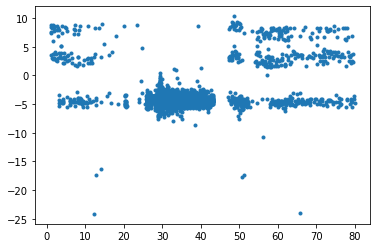

In [68]:
plt.plot(mzShifts[uids[5]]["retentionTime"], mzShifts[uids[5]]["mz_shift"], '.')

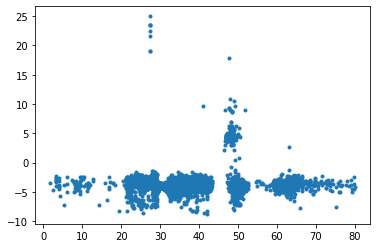

In [69]:
plt.plot(mzShifts[uids[6]]["retentionTime"], mzShifts[uids[6]]["mz_shift"], '.')

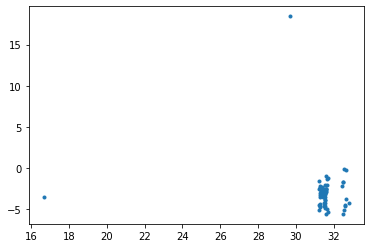

In [70]:
plt.plot(mzShifts[uids[7]]["retentionTime"], mzShifts[uids[7]]["mz_shift"], '.')

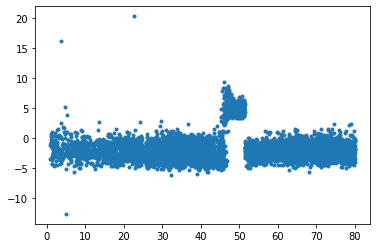

In [71]:
plt.plot(mzShifts[uids[8]]["retentionTime"], mzShifts[uids[8]]["mz_shift"], '.')

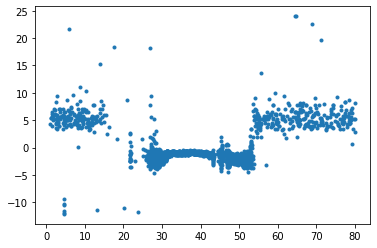

In [72]:
plt.plot(mzShifts[uids[9]]["retentionTime"], mzShifts[uids[9]]["mz_shift"], '.')

In [74]:
uids[5]

'HMDB00208'